In [14]:
import numpy as np
import matplotlib.pyplot as plt

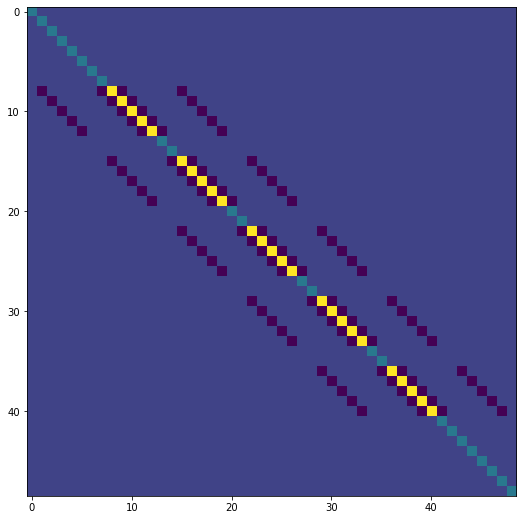

In [18]:
with open("out.mtx",'r') as file:
    content = file.readlines()
    
params = content[0].split()
rows = int(params[0])
cols = int(params[1])
n = int(params[2])

A = [[0 for i in range(cols)] for j in range(rows)]

content.pop(0)
for elemento in content:
    params = elemento.split()
    i = int(params[0])
    j = int(params[1])
    val = float(params[2])

    A[i][j] = val

mat = np.matrix(A)

plt.rcParams['figure.figsize'] = [16,9]
plt.imshow(mat)
plt.show()